<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/68/Animation_portail_musique.gif" alt="Piano gif from Wikipedia" />
</p>

# PyWavelets and Jingle Bells

**Part 1 for working with audio signals**

---

## Overview
This notebook will generate a wavelet scalogram to determine the order of notes in a short .wav file. You'll learn how to generate a Wavelet Power spectrum graph

1. Prerequisites
2. Background
3. PyWavelets Overview
4. Wavelet Power Spectrum

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Necessary | Used to plot data |
| [Intro to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | Used to read in and organize data (in particular dataframes) |
| [Intro to Numpy](https://foundations.projectpythia.org/core/numpy/numpy-basics.html)| Necessary | Used to work with large arrays |
| [Intro to SciPy](https://docs.scipy.org/doc/scipy-1.13.1/tutorial/fft.html) | Helpful | Used to work with .wav files and built-in Fast Fourier Transform |

- **Time to learn**: 20 minutes

---

## Background

Wavelet analysis is accomplished in Python via external package. [PyWavelets](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html#pywt.cwt) is an open source Python package for wavelet analysis

Either with pip install:
```
pip install PyWavelets
```

Or with conda
```
conda install pywavelets
```

## Imports

In [2]:
import numpy as np                          # working with arrays
import pandas as pd                         # working with dataframes
from scipy.io import wavfile                # loading in wav files
import matplotlib.pyplot as plt             # plot data
from scipy.fftpack import fft, fftfreq      # working with Fourier Transforms

import pywt                                 # PyWavelets

## PyWavelets Overview

PyWavelets returns both the coefficents and freqeuncy information for wavelets from the input data

```
coeffs, frequencies = pywt.cwt(data, scales, wavelet, sampling_period)
```

### Input Values
The [Continuous Wavelet Transform (CWT)](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html) in PyWavelets accepts multiple input values:

Required:
- data: input data (as an array)
- wavelet: name of the Mother wavelet
- scales: collection of the scales to use will determine the range which the wavelet will be streched or squished

Optional:
- sampling_period: sampling period for frequencies output. Scales are not scaled by the period (and coefficents are independent of the sampling_period)

### Return Values
The continuous wavelet transforms in PyWavelets returns two values:

- coefficents: collection of complex number outputs for wavelet coefficients
- frequencies: collection of frequencies, if the sampling period are in seconds then frequencies are in hertz otherwise a sampling period of 1 is assumed

The final size of coefficients depends on the length of the input data and the length of the given scales.

### Choosing a Scale
#### Scales vs. Frequency

The range of scales are a combination of the smallest scale (s0), spacing between discrete scales (dj), and the maximum scale (jtot). 

For the purpose of this exercise, the musical range of frequencies range from 261 - 494 Hz

| Note   | Freq   |
|--------|--------|
| A note | 440 hz |
| B note | 494 hz |
| C note | 261 hz |
| D note | 293 hz |
| E note | 330 hz |
| F note | 350 hz |
| G note | 392 hz |

It is good practice to include a range greater than precisely needed. This will make the bands for each frequeny in the wavelets clearer.

For example, scales from 1 to 40 represent a frequency range from 8125 - 208.33 Hz

```
sample_rate, signal_data = wavfile.read('jingle_bells.wav')
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signal_data, scales, wavelet = "morl")
```

## Extract audio .wav file
The .wav input file contains information about the amplitude at every time step (in seconds) in the file. The frequency of the note will determine which chord each part of the piece represents.

In [6]:
sampleRate, signalData = wavfile.read("../data/jingle_bells.wav")

duration = len(signalData) / sampleRate
time = np.arange(0, duration, 1/sampleRate) 

print(f"Sample Rate: {sampleRate}")
print(f"duration = {duration} seconds")
print(f"Total Length in time steps = {len(time)}")

Sample Rate: 10000
duration = 15.6991 seconds
Total Length in time steps = 156991


## Let's Give the Data a Look!

It is always good practice to view the data that we have collected. First, let's organize the data into a `pandas` dataframe to organize the amplitude and time stamps

In [28]:
signal_df = pd.DataFrame({'time (seconds)': time, 'amplitude': signalData})
signal_df.head()

,time (seconds),amplitude
0,0.0000,-417
1,0.0001,-2660
2,0.0002,-2491
3,0.0003,6441
4,0.0004,-8540


### Plot a Small Sample of the .wav File

Plot a small subsample of the .wav to visualize the input data

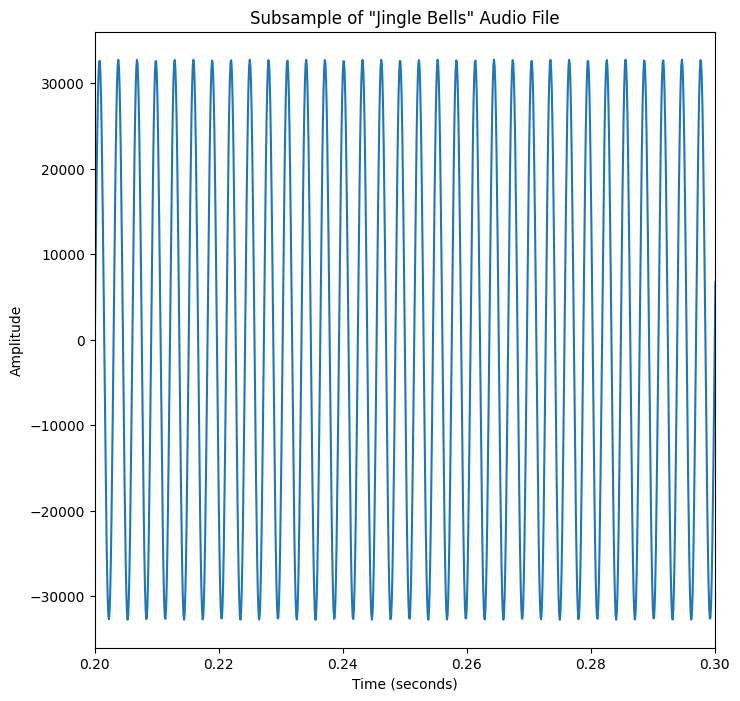

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.plot(signal_df["time (seconds)"], signal_df["amplitude"])
plt.title("Subsample of \"Jingle Bells\" Audio File")
ax.set_xlim(signal_df["time (seconds)"][2000], signal_df["time (seconds)"][3000])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

## Power Spectrum

`wavelet_coeffs` is a complex number with a real and an imaginary number (1 + 2i). The power spectrum plots the real component of the complex number. The real component represents the magntiude of the wavelet coefficient displayed as the absolute value of the coefficients squared

In [30]:
wavelet_mother = "morl" # morlet mother wavelet

# scale determines how squished or stretched a wavelet is
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signalData, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")

size (39, 156991) with 39 scales and 156991 time steps
x-axis be default is: 156991
y-axis be default is: 39


### A Note on Choosing the Right Scales

`freqs` is normalized frequencies, so needs to be multiplied by these sampling frequency to turn back into frequencies which means that you need to multiply them by your sampling frequency (500Hz) to turn them into actual frequencies

Frequency in Hz:
[8125.         4062.5        2708.33333333 2031.25       1625.
 1354.16666667 1160.71428571 1015.625       902.77777778  812.5
  738.63636364  677.08333333  625.          580.35714286  541.66666667
  507.8125      477.94117647  451.38888889  427.63157895  406.25
  386.9047619   369.31818182  353.26086957  338.54166667  325.
  312.5         300.92592593  290.17857143  280.17241379  270.83333333
  262.09677419  253.90625     246.21212121  238.97058824  232.14285714
  225.69444444  219.59459459  213.81578947  208.33333333]


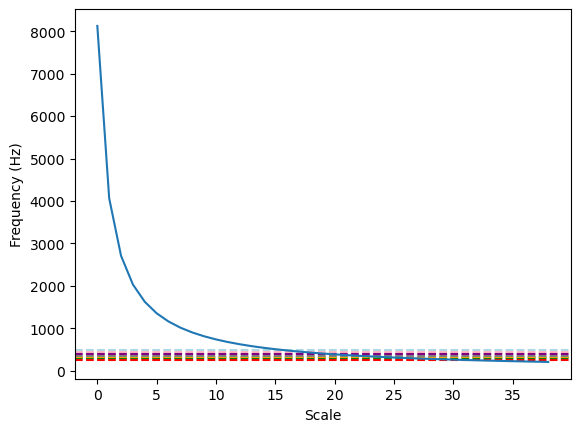

In [10]:
wavelet_mother = "morl" # morlet mother wavelet

# scale determines how squished or stretched a wavelet is
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signalData, scales, wavelet = wavelet_mother)

plt.axhline(y=440, color='lightpink', linestyle='--', label='A') # A note: 440 hz
plt.axhline(y=494, color="lightblue", linestyle='--', label='B') # B Note: 494 hz
plt.axhline(y=261, color='red', linestyle='--', label='C')       # C Note: 261 hz
plt.axhline(y=293, color='green', linestyle='--', label='D')     # D Note: 293 hz
plt.axhline(y=330, color='orange', linestyle='--', label='E')    # E Note: 330 hz
plt.axhline(y=350, color='grey', linestyle='--', label='F')      # F Note: 350 hz
plt.axhline(y=392, color='purple', linestyle='--', label='G')    # G Note: 392 hz

plt.xlabel("Scale")
plt.ylabel("Frequency (Hz)")
print(f"Frequency in Hz:\n{freqs*sampleRate}")
plt.plot(freqs*sampleRate)

## Plot scalogram

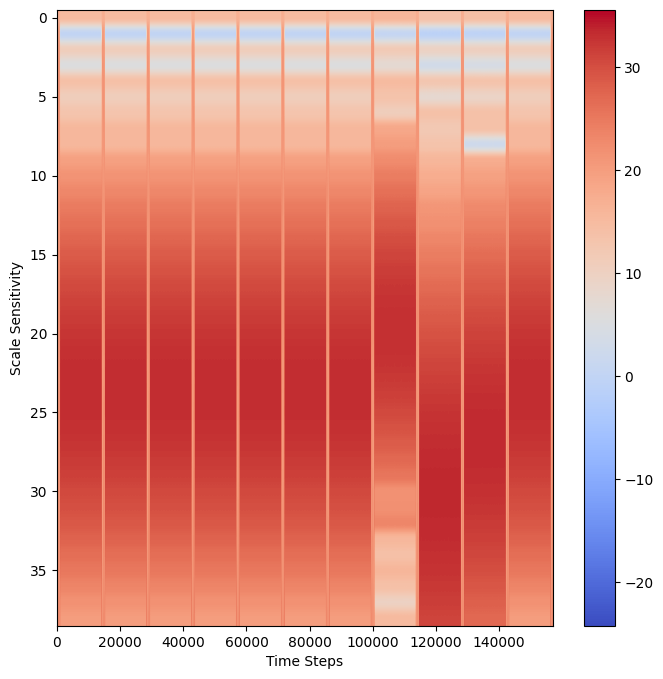

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
data = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.show()

## Overlay Possible Frequencies

To overlay these frequencies with the wavelet scaologram:
<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Important Note</p>
   To convert HZ frequency to a <code>scale = hz *.0001</code> (where 0.01 is 100 Hz sampling) then apply <code>frequency2scale()</code> PyWavelets function
</div>

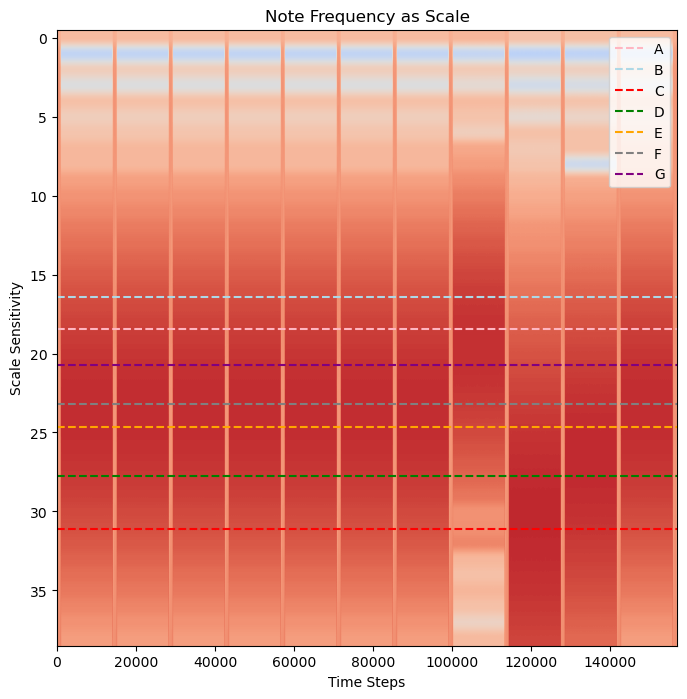

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay frequency of chords as dotted lines
sample_rate = 1/sampleRate
a_freq = pywt.frequency2scale(wavelet_mother, 440*sample_rate)
plt.axhline(y=a_freq, color='lightpink', linestyle='--', label='A') # A note: 440 hz
b_freq = pywt.frequency2scale(wavelet_mother, 494*sample_rate)
plt.axhline(y=b_freq, color="lightblue", linestyle='--', label='B') # B Note: 494 hz
c_freq = pywt.frequency2scale(wavelet_mother, 261*sample_rate)
plt.axhline(y=c_freq, color='red', linestyle='--', label='C')       # C Note: 261 hz
d_freq = pywt.frequency2scale(wavelet_mother, 293*sample_rate)
plt.axhline(y=d_freq, color='green', linestyle='--', label='D')     # D Note: 293 hz
e_freq = pywt.frequency2scale(wavelet_mother, 330*sample_rate)
plt.axhline(y=e_freq, color='orange', linestyle='--', label='E')    # E Note: 330 hz
f_freq = pywt.frequency2scale(wavelet_mother, 350*sample_rate)
plt.axhline(y=f_freq, color='grey', linestyle='--', label='F')      # F Note: 350 hz
g_freq = pywt.frequency2scale(wavelet_mother, 392*sample_rate)
plt.axhline(y=g_freq, color='purple', linestyle='--', label='G')    # G Note: 392 hz

# Plot Power scalogram
power = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.title("Note Frequency as Scale")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.legend()
plt.show()

## Determining Which Frequencies to Overlay

For this example, we know that the input data is "Jingle Bells" so known which chords are going to be used

```
"Jingle Bells, Jingle Bells, Jingle All the Way" as EEE EEE EGCDE
```

However, let's imagine that we aren't sure. Wavelets gain information about _when_ a frequency occurs, but at a lower resolution to an exact frequnecy. To determine which chords are a best fit, you can make use of FFT to determinine which chords to include. Without FFT, the larger possible ranges of frequency can make it possible to confuse nearby chords.

### Fast Fourier Transform

In [12]:
fourier_transform = abs(fft(signalData))
freqs = fftfreq(len(fourier_transform), sample_rate)

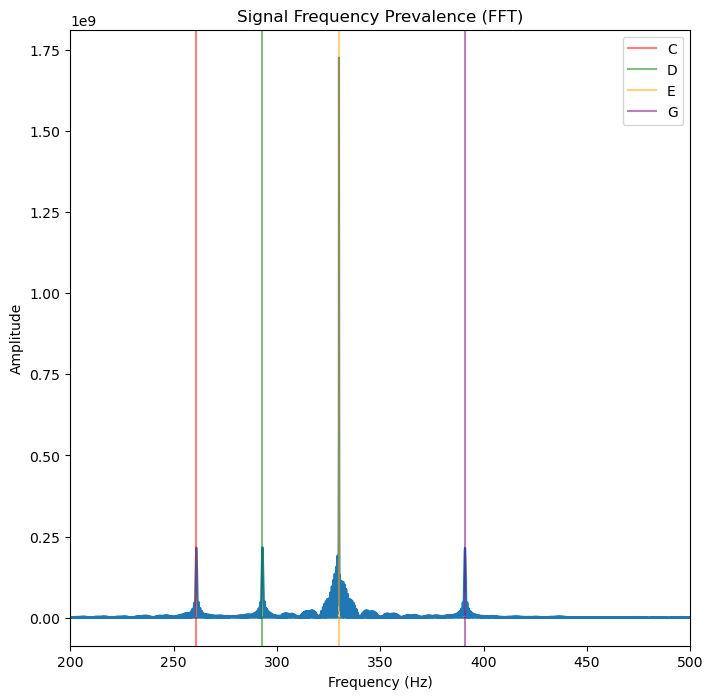

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
ax.set_xlim(left=200, right=500) 
plt.axvline(x=261, color="red", label="C",alpha=0.5)    # C Note: 261 hz
plt.axvline(x=293, color="green", label="D",alpha=0.5)  # D Note: 293 hz
plt.axvline(x=330, color="orange", label="E",alpha=0.5) # E Note: 330 hz
plt.axvline(x=391, color="purple", label="G",alpha=0.5) # G Note: 391 hz
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Overlay Frequency of Chords
Using FFT we can now say that there are four clear frequencies that are associated with four chords for CDEG

## Fast Fourier Transform Predicts Four Notes

FFT predicts an output with four notes: 

```
C, D, E, G
```
Let's plot the notes!

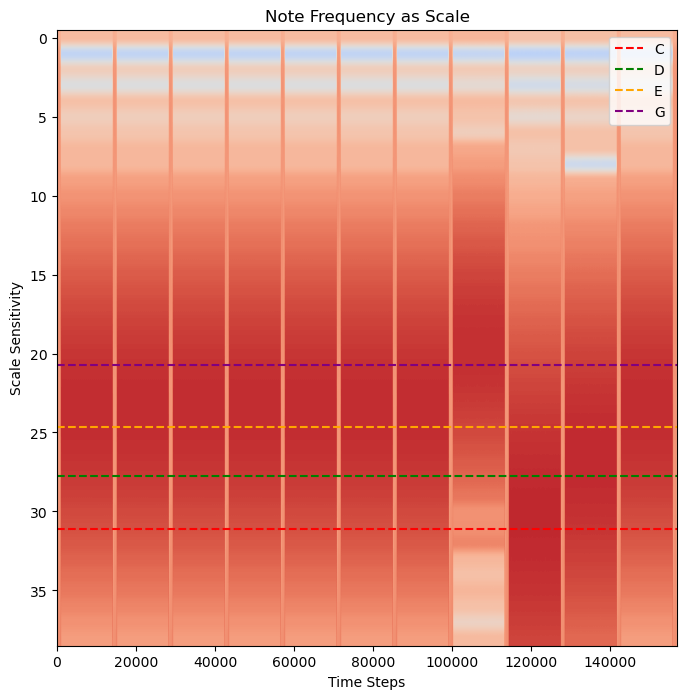

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay frequency of chords as dotted lines
sample_rate = 1/sampleRate
c_freq = pywt.frequency2scale(wavelet_mother, 261*sample_rate)
plt.axhline(y=c_freq, color='red', linestyle='--', label='C')       # C Note: 261 hz
d_freq = pywt.frequency2scale(wavelet_mother, 293*sample_rate)
plt.axhline(y=d_freq, color='green', linestyle='--', label='D')     # D Note: 293 hz
e_freq = pywt.frequency2scale(wavelet_mother, 330*sample_rate)
plt.axhline(y=e_freq, color='orange', linestyle='--', label='E')    # E Note: 330 hz
g_freq = pywt.frequency2scale(wavelet_mother, 392*sample_rate)
plt.axhline(y=g_freq, color='purple', linestyle='--', label='G')    # G Note: 392 hz

# Plot Power scalogram
power = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.title("Note Frequency as Scale")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.legend()
plt.show()

## Four Chords!

The darkest color correlates with the frequency at each time stamp. Rather than appearing as distinct peaks like Fourier Transform, wavelets return a gradient of frequencies. This is the loss in precision due to Heisenberg's Uncertainty Principle. While the frequencies can still be determined, there is some level of uncertainty in the exact frequencies. This is where combining wavelets with a Fourier Transform can be useful. We now know that this piece has four notes `CDEG`. The vertical bands represent where the note ends before the next note begins. This piece of music has a deliberate start and stop so this band will not always be as obvious in other pieces of music.

We can read this wavelet analysis by finding what note corresponds with the darkest band. 

We should now have the order of the notes, read from left to right:

### EEE EEE EGCDE

---

## Summary
Wavelets can report on both the frequency and time a frequency occurs. However, due to Heisenberg's Uncertainty Principle, by gaining resolution on time, some resolution on frequency is lost. It can be helpful to incorporate both a Fourier Transform and a Wavelet analysis to a signal to help determine the possible ranges of expected frequencies. `PyWavelets` is a free open-source package for wavelets in Python.

### What's next?

**Up next: apply wavelets transform to determine the frequency _and_ order of an unknown input!**